In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#create messey sample employee data
data = {
    "EmpId": [101, 102, "103", 104, 105, 106, 107, 108, 109, 110],
    "fullName": [
        "  Alice Johnson  ", "MICHEAL smith", "sarah lee", "David-Kim", None, "john brown",
        "Emma Wilson", "TOM  davis", "Jane Miller", "Chris taylor"
    ], 
     "Dept": ["IT", "hr", "Mktng", "IT", "Customer Care", "marketing", "Finance", None, "HR", "marketing"],
    "Age": [29, "thirty-five", 26, 31, 42, 27, 33, 30, None, 28],
    "Salary($)": ["$5500.50", "4800", "4200.75", "NaN", "6100", "4,300", "5800", "5000", "4700.0", "4400"],
    "JoinDate": [
        "2021/04/12", "2020/11/01", "2022/01/18", "2019/9/25", "2018/07/05", 
        "2021/10/14", "2019/12/01", "2020/03/22", "2021/05/10", "2022/02/05"
    ],
    "Performance": [87, "73", 90, 65, 82, 75, 88, None, "79%", "91"],
    "Remote?": ["Yes", "No", "Y", "N", "yes", "no", "Y", "Yes", None, "True"]
}

In [3]:
#create a dataframe for the data
df = pd.DataFrame(data)

#convert dataframe in csv file
df.to_csv("data/employee_dataset.csv", index=False)

#load dataset
df = pd.read_csv("data/employee_dataset.csv")
df

,EmpId,fullName,Dept,Age,Salary($),JoinDate,Performance,Remote?
0,101,Alice Johnson,IT,29,$5500.50,2021/04/12,87,Yes
1,102,MICHEAL smith,hr,thirty-five,4800,2020/11/01,73,No
2,103,sarah lee,Mktng,26,4200.75,2022/01/18,90,Y
3,104,David-Kim,IT,31,NaN,2019/9/25,65,N
4,105,NaN,Customer Care,42,6100,2018/07/05,82,yes
5,106,john brown,marketing,27,"4,300",2021/10/14,75,no
6,107,Emma Wilson,Finance,33,5800,2019/12/01,88,Y
7,108,TOM davis,NaN,30,5000,2020/03/22,NaN,Yes
8,109,Jane Miller,HR,NaN,4700.0,2021/05/10,79%,NaN
9,110,Chris taylor,marketing,28,4400,2022/02/05,91,True


In [4]:
#get the shape for the dataset
df.shape

(10, 8)

In [5]:
#get the information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   EmpId        10 non-null     int64 
 1   fullName     9 non-null      object
 2   Dept         9 non-null      object
 3   Age          9 non-null      object
 4   Salary($)    9 non-null      object
 5   JoinDate     10 non-null     object
 6   Performance  9 non-null      object
 7   Remote?      9 non-null      object
dtypes: int64(1), object(7)
memory usage: 768.0+ bytes


In [6]:
#get the first five rows
df.head()

,EmpId,fullName,Dept,Age,Salary($),JoinDate,Performance,Remote?
0,101,Alice Johnson,IT,29,$5500.50,2021/04/12,87,Yes
1,102,MICHEAL smith,hr,thirty-five,4800,2020/11/01,73,No
2,103,sarah lee,Mktng,26,4200.75,2022/01/18,90,Y
3,104,David-Kim,IT,31,NaN,2019/9/25,65,N
4,105,NaN,Customer Care,42,6100,2018/07/05,82,yes


In [7]:
#get the dataset columns
df.columns

Index(['EmpId', 'fullName', 'Dept', 'Age', 'Salary($)', 'JoinDate',
       'Performance', 'Remote?'],
      dtype='object')

In [8]:
#check for missing values
df.isnull().sum()

EmpId          0
fullName       1
Dept           1
Age            1
Salary($)      1
JoinDate       0
Performance    1
Remote?        1
dtype: int64

In [9]:
#inspect the unique values columns
print(df['Dept'].unique())
print(df['Age'].unique())
print(df['Remote?'].unique())

['IT' 'hr' 'Mktng' 'Customer Care' 'marketing' 'Finance' nan 'HR']
['29' 'thirty-five' '26' '31' '42' '27' '33' '30' nan '28']
['Yes' 'No' 'Y' 'N' 'yes' 'no' nan 'True']


In [10]:
#access series data
df['Salary($)'].tolist()

['$5500.50',
 '4800',
 '4200.75',
 nan,
 '6100',
 '4,300',
 '5800',
 '5000',
 '4700.0',
 '4400']

In [11]:
df['fullName'].tolist()

['  Alice Johnson  ',
 'MICHEAL smith',
 'sarah lee',
 'David-Kim',
 nan,
 'john brown',
 'Emma Wilson',
 'TOM  davis',
 'Jane Miller',
 'Chris taylor']

In [12]:
df['Salary($)'].head()

0    $5500.50
1        4800
2     4200.75
3         NaN
4        6100
Name: Salary($), dtype: object

In [13]:
#start cleaning the inconsistent values
# remain inconsistence columns
df.rename(columns={
    'EmpId': 'emp_id',
    'fullName': 'full_name',
    'Dept': 'department',
    'Age': 'age',
    'Salary($)': 'salary',
    'JoinDate': 'join_date',
    'Performance': 'performance',
    'Remote?': 'remote'
}, inplace=True)

df

,emp_id,full_name,department,age,salary,join_date,performance,remote
0,101,Alice Johnson,IT,29,$5500.50,2021/04/12,87,Yes
1,102,MICHEAL smith,hr,thirty-five,4800,2020/11/01,73,No
2,103,sarah lee,Mktng,26,4200.75,2022/01/18,90,Y
3,104,David-Kim,IT,31,NaN,2019/9/25,65,N
4,105,NaN,Customer Care,42,6100,2018/07/05,82,yes
5,106,john brown,marketing,27,"4,300",2021/10/14,75,no
6,107,Emma Wilson,Finance,33,5800,2019/12/01,88,Y
7,108,TOM davis,NaN,30,5000,2020/03/22,NaN,Yes
8,109,Jane Miller,HR,NaN,4700.0,2021/05/10,79%,NaN
9,110,Chris taylor,marketing,28,4400,2022/02/05,91,True


In [14]:
#clean inconsistent values in full_name
df['full_name'] = df['full_name'].str.strip()
df['full_name'] = df['full_name'].str.title()
df['full_name'] = df['full_name'].str.replace(r'\s+', " ", regex=True)
df['full_name'] = df['full_name'].str.replace('-', " ")
df['full_name'].tolist()

['Alice Johnson',
 'Micheal Smith',
 'Sarah Lee',
 'David Kim',
 nan,
 'John Brown',
 'Emma Wilson',
 'Tom Davis',
 'Jane Miller',
 'Chris Taylor']

In [15]:
#clean inconsistent values in department
df['department'].replace({
    'hr': 'HR',
    'Mktng': 'Marketing',
    'marketing': 'Marketing',
    
}, inplace=True)

df['department']

C:\Users\ola-dev\AppData\Local\Temp\ipykernel_23636\145558366.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['department'].replace({


0               IT
1               HR
2        Marketing
3               IT
4    Customer Care
5        Marketing
6          Finance
7              NaN
8               HR
9        Marketing
Name: department, dtype: object

In [16]:
#clean inconsistent values in age
def clean_age(value):
    if value == 'thirty-five':
        return 35
    elif isinstance(value, (int, float)):
        return value
    elif isinstance(value, str) and value.isdigit():
        return int(value)
    else:
        return np.nan
df['age'] = df['age'].apply(clean_age)
df['age']

0    29.0
1    35.0
2    26.0
3    31.0
4    42.0
5    27.0
6    33.0
7    30.0
8     NaN
9    28.0
Name: age, dtype: float64

In [17]:
#clean inconsistent value in salary column
df['salary'] = (
    df['salary']
    .astype(str)
    .replace('[$,]', "", regex=True)
    .replace("NaN", np.nan)
    .astype(float)
)
df['salary']

0    5500.50
1    4800.00
2    4200.75
3        NaN
4    6100.00
5    4300.00
6    5800.00
7    5000.00
8    4700.00
9    4400.00
Name: salary, dtype: float64

In [18]:
#clean inconsistent value in join-date column
df['join_date'] = pd.to_datetime(df['join_date'], errors="coerce")
df['join_date']

0   2021-04-12
1   2020-11-01
2   2022-01-18
3   2019-09-25
4   2018-07-05
5   2021-10-14
6   2019-12-01
7   2020-03-22
8   2021-05-10
9   2022-02-05
Name: join_date, dtype: datetime64[ns]

In [19]:
#clean inconsistent value in salary column
df['performance'] = (
    df['performance']
    .astype(str)
    .str.replace('%', "", regex=False)
    .replace("None", np.nan)
    .astype(float)
)
df['performance']

0    87.0
1    73.0
2    90.0
3    65.0
4    82.0
5    75.0
6    88.0
7     NaN
8    79.0
9    91.0
Name: performance, dtype: float64

In [20]:
#clean inconsistent value in remote column
df['remote'].replace({
    'Y': 'Yes',
    'N': 'No',
    'yes': 'Yes',
    'no': 'No',
    "True" : 'Yes',
    "None" : np.nan
}, inplace=True)
df['remote']

C:\Users\ola-dev\AppData\Local\Temp\ipykernel_23636\1572571858.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['remote'].replace({


0    Yes
1     No
2    Yes
3     No
4    Yes
5     No
6    Yes
7    Yes
8    NaN
9    Yes
Name: remote, dtype: object

In [21]:
#clean inconsistent value in empid column
df['emp_id'] = pd.to_numeric(df['emp_id'], errors='coerce')
df['emp_id']

0    101
1    102
2    103
3    104
4    105
5    106
6    107
7    108
8    109
9    110
Name: emp_id, dtype: int64

In [22]:
#check the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   emp_id       10 non-null     int64         
 1   full_name    9 non-null      object        
 2   department   9 non-null      object        
 3   age          9 non-null      float64       
 4   salary       9 non-null      float64       
 5   join_date    10 non-null     datetime64[ns]
 6   performance  9 non-null      float64       
 7   remote       9 non-null      object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 768.0+ bytes


In [23]:
#handle missing value
df['full_name'] = df['full_name'].fillna('Unknown')
df['full_name']

0    Alice Johnson
1    Micheal Smith
2        Sarah Lee
3        David Kim
4          Unknown
5       John Brown
6      Emma Wilson
7        Tom Davis
8      Jane Miller
9     Chris Taylor
Name: full_name, dtype: object

In [24]:
df['department'] = df['department'].fillna(df['department'].mode()[0])
df['department']

0               IT
1               HR
2        Marketing
3               IT
4    Customer Care
5        Marketing
6          Finance
7        Marketing
8               HR
9        Marketing
Name: department, dtype: object

In [25]:
df['age'] = df['age'].fillna(df['age'].median())
df['age']

0    29.0
1    35.0
2    26.0
3    31.0
4    42.0
5    27.0
6    33.0
7    30.0
8    30.0
9    28.0
Name: age, dtype: float64

In [26]:
df['salary'] = df['salary'].fillna(df['salary'].median())
df['salary']

0    5500.50
1    4800.00
2    4200.75
3    4800.00
4    6100.00
5    4300.00
6    5800.00
7    5000.00
8    4700.00
9    4400.00
Name: salary, dtype: float64

In [27]:
df['performance'] = df['performance'].fillna(df['performance'].median())
df['performance']

0    87.0
1    73.0
2    90.0
3    65.0
4    82.0
5    75.0
6    88.0
7    82.0
8    79.0
9    91.0
Name: performance, dtype: float64

In [28]:
df['remote'] = df['remote'].fillna(df['remote'].mode()[0])
df['remote']

0    Yes
1     No
2    Yes
3     No
4    Yes
5     No
6    Yes
7    Yes
8    Yes
9    Yes
Name: remote, dtype: object

In [29]:
#working with filter data
df.head()

,emp_id,full_name,department,age,salary,join_date,performance,remote
0,101,Alice Johnson,IT,29.0,5500.50,2021-04-12,87.0,Yes
1,102,Micheal Smith,HR,35.0,4800.00,2020-11-01,73.0,No
2,103,Sarah Lee,Marketing,26.0,4200.75,2022-01-18,90.0,Yes
3,104,David Kim,IT,31.0,4800.00,2019-09-25,65.0,No
4,105,Unknown,Customer Care,42.0,6100.00,2018-07-05,82.0,Yes


In [30]:
df['full_name']

0    Alice Johnson
1    Micheal Smith
2        Sarah Lee
3        David Kim
4          Unknown
5       John Brown
6      Emma Wilson
7        Tom Davis
8      Jane Miller
9     Chris Taylor
Name: full_name, dtype: object

In [31]:
df[['full_name', 'salary', 'performance']]

,full_name,salary,performance
0,Alice Johnson,5500.50,87.0
1,Micheal Smith,4800.00,73.0
2,Sarah Lee,4200.75,90.0
3,David Kim,4800.00,65.0
4,Unknown,6100.00,82.0
5,John Brown,4300.00,75.0
6,Emma Wilson,5800.00,88.0
7,Tom Davis,5000.00,82.0
8,Jane Miller,4700.00,79.0
9,Chris Taylor,4400.00,91.0


In [32]:
df.iloc[0:3, 0:3]

,emp_id,full_name,department
0,101,Alice Johnson,IT
1,102,Micheal Smith,HR
2,103,Sarah Lee,Marketing


In [33]:
df.iloc[0:3]

,emp_id,full_name,department,age,salary,join_date,performance,remote
0,101,Alice Johnson,IT,29.0,5500.50,2021-04-12,87.0,Yes
1,102,Micheal Smith,HR,35.0,4800.00,2020-11-01,73.0,No
2,103,Sarah Lee,Marketing,26.0,4200.75,2022-01-18,90.0,Yes


In [34]:
df.loc[df['salary'] >= 5000]

,emp_id,full_name,department,age,salary,join_date,performance,remote
0,101,Alice Johnson,IT,29.0,5500.5,2021-04-12,87.0,Yes
4,105,Unknown,Customer Care,42.0,6100.0,2018-07-05,82.0,Yes
6,107,Emma Wilson,Finance,33.0,5800.0,2019-12-01,88.0,Yes
7,108,Tom Davis,Marketing,30.0,5000.0,2020-03-22,82.0,Yes


In [35]:
df.loc[df['salary'] >= 5000, ['full_name', 'department']]

,full_name,department
0,Alice Johnson,IT
4,Unknown,Customer Care
6,Emma Wilson,Finance
7,Tom Davis,Marketing


In [36]:
df[df['department'] == 'IT']

,emp_id,full_name,department,age,salary,join_date,performance,remote
0,101,Alice Johnson,IT,29.0,5500.5,2021-04-12,87.0,Yes
3,104,David Kim,IT,31.0,4800.0,2019-09-25,65.0,No


In [37]:
df[df['age'] > 30]

,emp_id,full_name,department,age,salary,join_date,performance,remote
1,102,Micheal Smith,HR,35.0,4800.0,2020-11-01,73.0,No
3,104,David Kim,IT,31.0,4800.0,2019-09-25,65.0,No
4,105,Unknown,Customer Care,42.0,6100.0,2018-07-05,82.0,Yes
6,107,Emma Wilson,Finance,33.0,5800.0,2019-12-01,88.0,Yes


In [38]:
df[df['department'] != 'HR']

,emp_id,full_name,department,age,salary,join_date,performance,remote
0,101,Alice Johnson,IT,29.0,5500.50,2021-04-12,87.0,Yes
2,103,Sarah Lee,Marketing,26.0,4200.75,2022-01-18,90.0,Yes
3,104,David Kim,IT,31.0,4800.00,2019-09-25,65.0,No
4,105,Unknown,Customer Care,42.0,6100.00,2018-07-05,82.0,Yes
5,106,John Brown,Marketing,27.0,4300.00,2021-10-14,75.0,No
6,107,Emma Wilson,Finance,33.0,5800.00,2019-12-01,88.0,Yes
7,108,Tom Davis,Marketing,30.0,5000.00,2020-03-22,82.0,Yes
9,110,Chris Taylor,Marketing,28.0,4400.00,2022-02-05,91.0,Yes


In [39]:
df[
    (df['salary'] > 4000) & (df['remote'] == 'Yes')
]

,emp_id,full_name,department,age,salary,join_date,performance,remote
0,101,Alice Johnson,IT,29.0,5500.50,2021-04-12,87.0,Yes
2,103,Sarah Lee,Marketing,26.0,4200.75,2022-01-18,90.0,Yes
4,105,Unknown,Customer Care,42.0,6100.00,2018-07-05,82.0,Yes
6,107,Emma Wilson,Finance,33.0,5800.00,2019-12-01,88.0,Yes
7,108,Tom Davis,Marketing,30.0,5000.00,2020-03-22,82.0,Yes
8,109,Jane Miller,HR,30.0,4700.00,2021-05-10,79.0,Yes
9,110,Chris Taylor,Marketing,28.0,4400.00,2022-02-05,91.0,Yes


In [40]:
df[df['department'].isin(['IT', 'Finance'])]

,emp_id,full_name,department,age,salary,join_date,performance,remote
0,101,Alice Johnson,IT,29.0,5500.5,2021-04-12,87.0,Yes
3,104,David Kim,IT,31.0,4800.0,2019-09-25,65.0,No
6,107,Emma Wilson,Finance,33.0,5800.0,2019-12-01,88.0,Yes


In [41]:
df[df['full_name'].str.contains('john', case=False)]

,emp_id,full_name,department,age,salary,join_date,performance,remote
0,101,Alice Johnson,IT,29.0,5500.5,2021-04-12,87.0,Yes
5,106,John Brown,Marketing,27.0,4300.0,2021-10-14,75.0,No


In [42]:
df[df['department'].str.startswith('M')]

,emp_id,full_name,department,age,salary,join_date,performance,remote
2,103,Sarah Lee,Marketing,26.0,4200.75,2022-01-18,90.0,Yes
5,106,John Brown,Marketing,27.0,4300.00,2021-10-14,75.0,No
7,108,Tom Davis,Marketing,30.0,5000.00,2020-03-22,82.0,Yes
9,110,Chris Taylor,Marketing,28.0,4400.00,2022-02-05,91.0,Yes


In [43]:
#working with sorts
df.sort_values('salary', ascending=False)

,emp_id,full_name,department,age,salary,join_date,performance,remote
4,105,Unknown,Customer Care,42.0,6100.00,2018-07-05,82.0,Yes
6,107,Emma Wilson,Finance,33.0,5800.00,2019-12-01,88.0,Yes
0,101,Alice Johnson,IT,29.0,5500.50,2021-04-12,87.0,Yes
7,108,Tom Davis,Marketing,30.0,5000.00,2020-03-22,82.0,Yes
1,102,Micheal Smith,HR,35.0,4800.00,2020-11-01,73.0,No
3,104,David Kim,IT,31.0,4800.00,2019-09-25,65.0,No
8,109,Jane Miller,HR,30.0,4700.00,2021-05-10,79.0,Yes
9,110,Chris Taylor,Marketing,28.0,4400.00,2022-02-05,91.0,Yes
5,106,John Brown,Marketing,27.0,4300.00,2021-10-14,75.0,No
2,103,Sarah Lee,Marketing,26.0,4200.75,2022-01-18,90.0,Yes


In [44]:
df.sort_values('performance', ascending=False)

,emp_id,full_name,department,age,salary,join_date,performance,remote
9,110,Chris Taylor,Marketing,28.0,4400.00,2022-02-05,91.0,Yes
2,103,Sarah Lee,Marketing,26.0,4200.75,2022-01-18,90.0,Yes
6,107,Emma Wilson,Finance,33.0,5800.00,2019-12-01,88.0,Yes
0,101,Alice Johnson,IT,29.0,5500.50,2021-04-12,87.0,Yes
7,108,Tom Davis,Marketing,30.0,5000.00,2020-03-22,82.0,Yes
4,105,Unknown,Customer Care,42.0,6100.00,2018-07-05,82.0,Yes
8,109,Jane Miller,HR,30.0,4700.00,2021-05-10,79.0,Yes
5,106,John Brown,Marketing,27.0,4300.00,2021-10-14,75.0,No
1,102,Micheal Smith,HR,35.0,4800.00,2020-11-01,73.0,No
3,104,David Kim,IT,31.0,4800.00,2019-09-25,65.0,No


In [45]:
df.sort_values(['department', 'salary'], ascending=[True, False])

,emp_id,full_name,department,age,salary,join_date,performance,remote
4,105,Unknown,Customer Care,42.0,6100.00,2018-07-05,82.0,Yes
6,107,Emma Wilson,Finance,33.0,5800.00,2019-12-01,88.0,Yes
1,102,Micheal Smith,HR,35.0,4800.00,2020-11-01,73.0,No
8,109,Jane Miller,HR,30.0,4700.00,2021-05-10,79.0,Yes
0,101,Alice Johnson,IT,29.0,5500.50,2021-04-12,87.0,Yes
3,104,David Kim,IT,31.0,4800.00,2019-09-25,65.0,No
7,108,Tom Davis,Marketing,30.0,5000.00,2020-03-22,82.0,Yes
9,110,Chris Taylor,Marketing,28.0,4400.00,2022-02-05,91.0,Yes
5,106,John Brown,Marketing,27.0,4300.00,2021-10-14,75.0,No
2,103,Sarah Lee,Marketing,26.0,4200.75,2022-01-18,90.0,Yes


In [46]:
#working with value count
df['department'].value_counts()

department
Marketing        4
IT               2
HR               2
Customer Care    1
Finance          1
Name: count, dtype: int64

In [47]:
df['department'].value_counts(normalize=True)

department
Marketing        0.4
IT               0.2
HR               0.2
Customer Care    0.1
Finance          0.1
Name: proportion, dtype: float64

In [48]:
df['remote'].value_counts(normalize=True)

remote
Yes    0.7
No     0.3
Name: proportion, dtype: float64

In [49]:
data1 = {
    "department": ["IT", "HR", "Finance", "Marketing", "R&D", "Operations", "Sales", "Logistics", "Procurement", "Customer Service"],
    "manager": [
        "Tom Hanks", "Susan Lee", "Robert Miles", 
        "Mark Chan", "Sarah Connor", "James Nwosu", "Adaeze Obi", 
        "Daniel Smith", "Amina Yusuf", "Grace Ojo"
    ],
    "department_budget": [200000, 150000, 250000, 180000, 300000, 220000, 210000, 195000, 230000, 170000],
    "office_location": [
        "Lagos", "Abuja", "Port Harcourt", "Ibadan", "Enugu", "Kano",
        "Lagos", "Calabar", "Abuja", "Kano"
    ]
}

df1 = pd.DataFrame(data1)

df1.to_csv("data/department_data.csv", index=False)

df1 = pd.read_csv("data/department_data.csv")

df1.head(10)

,department,manager,department_budget,office_location
0,IT,Tom Hanks,200000,Lagos
1,HR,Susan Lee,150000,Abuja
2,Finance,Robert Miles,250000,Port Harcourt
3,Marketing,Mark Chan,180000,Ibadan
4,R&D,Sarah Connor,300000,Enugu
5,Operations,James Nwosu,220000,Kano
6,Sales,Adaeze Obi,210000,Lagos
7,Logistics,Daniel Smith,195000,Calabar
8,Procurement,Amina Yusuf,230000,Abuja
9,Customer Service,Grace Ojo,170000,Kano


In [50]:
merge_df = pd.merge(df, df1, how='inner')
merge_df

,emp_id,full_name,department,age,salary,join_date,performance,remote,manager,department_budget,office_location
0,101,Alice Johnson,IT,29.0,5500.50,2021-04-12,87.0,Yes,Tom Hanks,200000,Lagos
1,102,Micheal Smith,HR,35.0,4800.00,2020-11-01,73.0,No,Susan Lee,150000,Abuja
2,103,Sarah Lee,Marketing,26.0,4200.75,2022-01-18,90.0,Yes,Mark Chan,180000,Ibadan
3,104,David Kim,IT,31.0,4800.00,2019-09-25,65.0,No,Tom Hanks,200000,Lagos
4,106,John Brown,Marketing,27.0,4300.00,2021-10-14,75.0,No,Mark Chan,180000,Ibadan
5,107,Emma Wilson,Finance,33.0,5800.00,2019-12-01,88.0,Yes,Robert Miles,250000,Port Harcourt
6,108,Tom Davis,Marketing,30.0,5000.00,2020-03-22,82.0,Yes,Mark Chan,180000,Ibadan
7,109,Jane Miller,HR,30.0,4700.00,2021-05-10,79.0,Yes,Susan Lee,150000,Abuja
8,110,Chris Taylor,Marketing,28.0,4400.00,2022-02-05,91.0,Yes,Mark Chan,180000,Ibadan


In [51]:
left_df = pd.merge(df, df1, how='left')
left_df

,emp_id,full_name,department,age,salary,join_date,performance,remote,manager,department_budget,office_location
0,101,Alice Johnson,IT,29.0,5500.50,2021-04-12,87.0,Yes,Tom Hanks,200000.0,Lagos
1,102,Micheal Smith,HR,35.0,4800.00,2020-11-01,73.0,No,Susan Lee,150000.0,Abuja
2,103,Sarah Lee,Marketing,26.0,4200.75,2022-01-18,90.0,Yes,Mark Chan,180000.0,Ibadan
3,104,David Kim,IT,31.0,4800.00,2019-09-25,65.0,No,Tom Hanks,200000.0,Lagos
4,105,Unknown,Customer Care,42.0,6100.00,2018-07-05,82.0,Yes,NaN,NaN,NaN
5,106,John Brown,Marketing,27.0,4300.00,2021-10-14,75.0,No,Mark Chan,180000.0,Ibadan
6,107,Emma Wilson,Finance,33.0,5800.00,2019-12-01,88.0,Yes,Robert Miles,250000.0,Port Harcourt
7,108,Tom Davis,Marketing,30.0,5000.00,2020-03-22,82.0,Yes,Mark Chan,180000.0,Ibadan
8,109,Jane Miller,HR,30.0,4700.00,2021-05-10,79.0,Yes,Susan Lee,150000.0,Abuja
9,110,Chris Taylor,Marketing,28.0,4400.00,2022-02-05,91.0,Yes,Mark Chan,180000.0,Ibadan


In [52]:
right_df = pd.merge(df, df1, how='right')
right_df

,emp_id,full_name,department,age,salary,join_date,performance,remote,manager,department_budget,office_location
0,101.0,Alice Johnson,IT,29.0,5500.50,2021-04-12,87.0,Yes,Tom Hanks,200000,Lagos
1,104.0,David Kim,IT,31.0,4800.00,2019-09-25,65.0,No,Tom Hanks,200000,Lagos
2,102.0,Micheal Smith,HR,35.0,4800.00,2020-11-01,73.0,No,Susan Lee,150000,Abuja
3,109.0,Jane Miller,HR,30.0,4700.00,2021-05-10,79.0,Yes,Susan Lee,150000,Abuja
4,107.0,Emma Wilson,Finance,33.0,5800.00,2019-12-01,88.0,Yes,Robert Miles,250000,Port Harcourt
5,103.0,Sarah Lee,Marketing,26.0,4200.75,2022-01-18,90.0,Yes,Mark Chan,180000,Ibadan
6,106.0,John Brown,Marketing,27.0,4300.00,2021-10-14,75.0,No,Mark Chan,180000,Ibadan
7,108.0,Tom Davis,Marketing,30.0,5000.00,2020-03-22,82.0,Yes,Mark Chan,180000,Ibadan
8,110.0,Chris Taylor,Marketing,28.0,4400.00,2022-02-05,91.0,Yes,Mark Chan,180000,Ibadan
9,NaN,NaN,R&D,NaN,NaN,NaT,NaN,NaN,Sarah Connor,300000,Enugu


In [53]:
print(merge_df['salary'].mean())

4833.472222222223


In [54]:
#average salary by department
merge_df.groupby('department')['salary'].mean().sort_values(ascending=False)

department
Finance      5800.0000
IT           5150.2500
HR           4750.0000
Marketing    4475.1875
Name: salary, dtype: float64

In [55]:
#average performance by department
merge_df.groupby('department')['performance'].mean().sort_values(ascending=False)

department
Finance      88.0
Marketing    84.5
HR           76.0
IT           76.0
Name: performance, dtype: float64

In [56]:
#average performance by department and remote
merge_df.groupby(['department', 'remote'])['performance'].mean().sort_values(ascending=False)

department  remote
Finance     Yes       88.000000
Marketing   Yes       87.666667
IT          Yes       87.000000
HR          Yes       79.000000
Marketing   No        75.000000
HR          No        73.000000
IT          No        65.000000
Name: performance, dtype: float64

In [57]:
#working with multiple aggregation
merge_df.groupby('department')['salary'].agg({'mean', 'count', 'min', 'max'})


,count,max,mean,min
department,,,,
Finance,1,5800.0,5800.0000,5800.00
HR,2,4800.0,4750.0000,4700.00
IT,2,5500.5,5150.2500,4800.00
Marketing,4,5000.0,4475.1875,4200.75


In [58]:
#group multiple columns apply to several
merge_df.groupby('department')[['salary', 'performance']].mean()

,salary,performance
department,,
Finance,5800.0000,88.0
HR,4750.0000,76.0
IT,5150.2500,76.0
Marketing,4475.1875,84.5


In [59]:
merge_df.groupby('department').agg(
    avg_salary=('salary', 'mean'),
    highest_salary=('salary', 'max'),
    lowest_salary=('salary', 'min'),
    employee_count=('salary', 'count')
)

,avg_salary,highest_salary,lowest_salary,employee_count
department,,,,
Finance,5800.0000,5800.0,5800.00,1
HR,4750.0000,4800.0,4700.00,2
IT,5150.2500,5500.5,4800.00,2
Marketing,4475.1875,5000.0,4200.75,4


In [60]:
merge_df.groupby('department').agg(
    avg_salary=('salary', 'mean'),
    total_employee=('emp_id', 'count'),
    avg_performance=('performance', 'mean')
)

,avg_salary,total_employee,avg_performance
department,,,
Finance,5800.0000,1,88.0
HR,4750.0000,2,76.0
IT,5150.2500,2,76.0
Marketing,4475.1875,4,84.5


In [61]:
#group column by salary with reset index
merge_df.groupby('department')['salary'].mean().reset_index()

,department,salary
0,Finance,5800.0000
1,HR,4750.0000
2,IT,5150.2500
3,Marketing,4475.1875


In [62]:
merge_df.groupby('department')['salary'].apply(lambda x: x.std())

department
Finance             NaN
HR            70.710678
IT           495.328300
Marketing    359.206497
Name: salary, dtype: float64

In [63]:
merge_df.groupby('department').filter(lambda x: x['salary'].mean() > 5000)

,emp_id,full_name,department,age,salary,join_date,performance,remote,manager,department_budget,office_location
0,101,Alice Johnson,IT,29.0,5500.5,2021-04-12,87.0,Yes,Tom Hanks,200000,Lagos
3,104,David Kim,IT,31.0,4800.0,2019-09-25,65.0,No,Tom Hanks,200000,Lagos
5,107,Emma Wilson,Finance,33.0,5800.0,2019-12-01,88.0,Yes,Robert Miles,250000,Port Harcourt


In [64]:
merge_df['department_avg_salary'] = merge_df.groupby('department')['salary'].transform('mean')
merge_df

,emp_id,full_name,department,age,salary,join_date,performance,remote,manager,department_budget,office_location,department_avg_salary
0,101,Alice Johnson,IT,29.0,5500.50,2021-04-12,87.0,Yes,Tom Hanks,200000,Lagos,5150.2500
1,102,Micheal Smith,HR,35.0,4800.00,2020-11-01,73.0,No,Susan Lee,150000,Abuja,4750.0000
2,103,Sarah Lee,Marketing,26.0,4200.75,2022-01-18,90.0,Yes,Mark Chan,180000,Ibadan,4475.1875
3,104,David Kim,IT,31.0,4800.00,2019-09-25,65.0,No,Tom Hanks,200000,Lagos,5150.2500
4,106,John Brown,Marketing,27.0,4300.00,2021-10-14,75.0,No,Mark Chan,180000,Ibadan,4475.1875
5,107,Emma Wilson,Finance,33.0,5800.00,2019-12-01,88.0,Yes,Robert Miles,250000,Port Harcourt,5800.0000
6,108,Tom Davis,Marketing,30.0,5000.00,2020-03-22,82.0,Yes,Mark Chan,180000,Ibadan,4475.1875
7,109,Jane Miller,HR,30.0,4700.00,2021-05-10,79.0,Yes,Susan Lee,150000,Abuja,4750.0000
8,110,Chris Taylor,Marketing,28.0,4400.00,2022-02-05,91.0,Yes,Mark Chan,180000,Ibadan,4475.1875


In [65]:
merge_df.groupby('department')['salary'].apply(lambda x: x.max() - x.min())

department
Finance        0.00
HR           100.00
IT           700.50
Marketing    799.25
Name: salary, dtype: float64

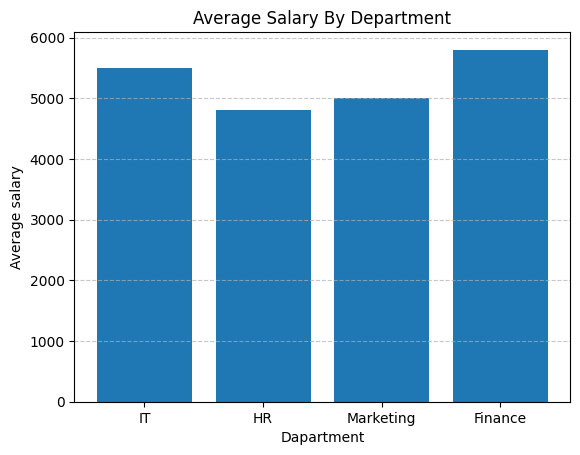

In [66]:
#average salary by department
plt.bar(merge_df['department'], merge_df['salary'])
plt.title('Average Salary By Department')
plt.xlabel("Dapartment")
plt.ylabel("Average salary")
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()

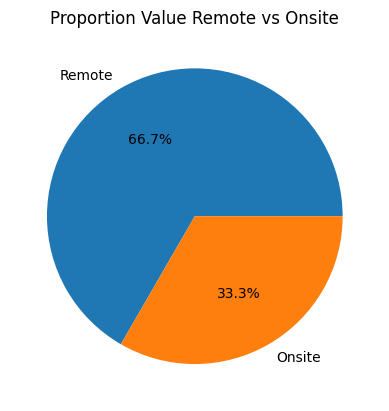

In [67]:
#view proportion remote vs onsite 
remote_status = ['Remote', 'Onsite']
plt.pie(merge_df['remote'].value_counts(), labels=remote_status, autopct="%1.1f%%")
plt.title('Proportion Value Remote vs Onsite')
plt.show()

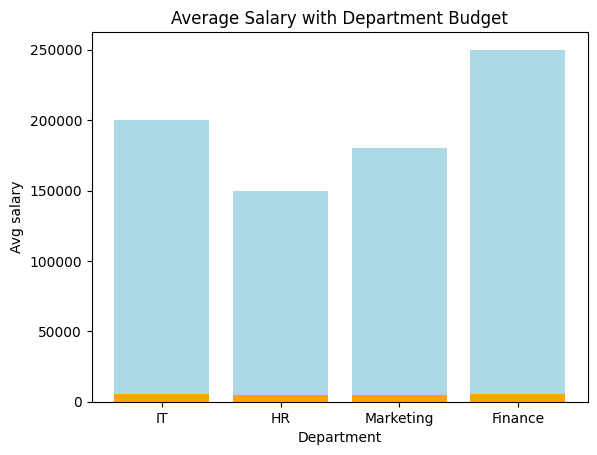

In [68]:
#visualize stack chart for department avg salary and department budget
plt.bar(merge_df['department'], merge_df['department_budget'], color='lightblue', label='Budget')
plt.bar(merge_df['department'], merge_df['department_avg_salary'], color='orange', label='Avg salary')
plt.title('Average Salary with Department Budget')
plt.xlabel('Department')
plt.ylabel('Avg salary')
plt.show()

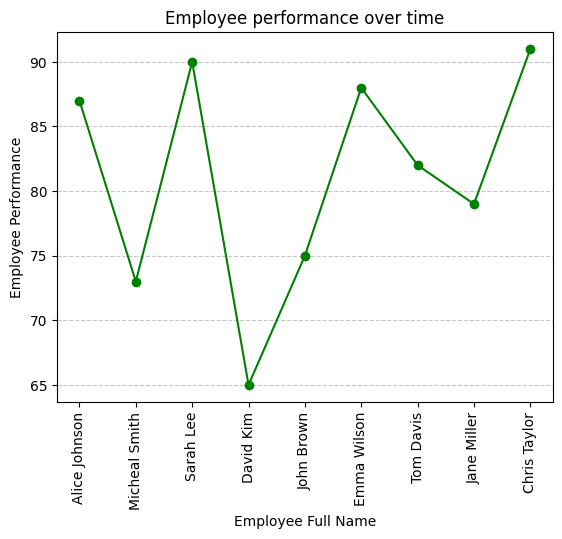

In [69]:
#visualize the employee performance overtime
plt.plot(merge_df['full_name'], merge_df['performance'], marker='o', color='green')
plt.title('Employee performance over time')
plt.xlabel('Employee Full Name')
plt.ylabel('Employee Performance')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()

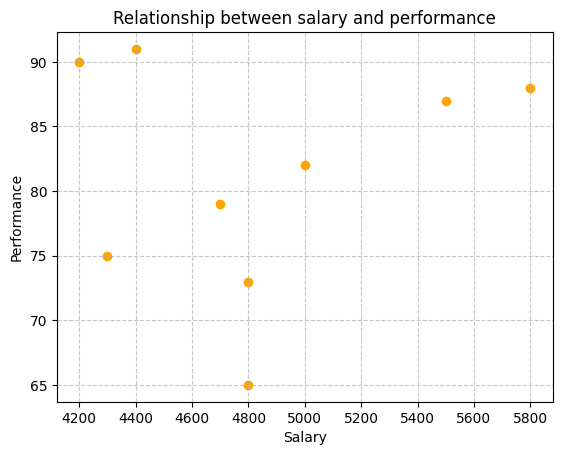

In [70]:
#visualize relationship between salary and performance
plt.scatter(merge_df['salary'], merge_df['performance'], color='orange')
plt.title("Relationship between salary and performance")
plt.xlabel('Salary')
plt.ylabel('Performance')
plt.grid(linestyle="--", alpha=0.7)
plt.show()

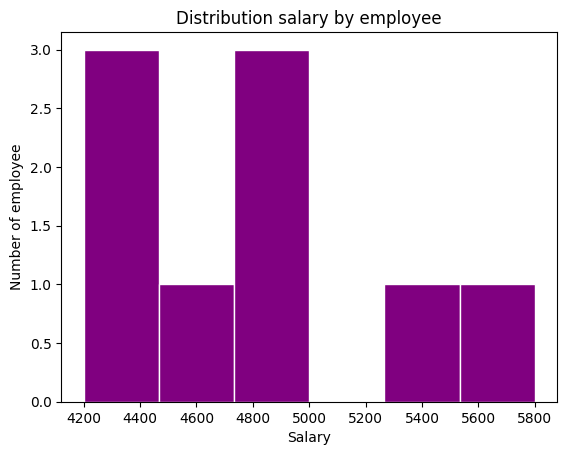

In [71]:
#visualize the distribution of salary by employee
plt.hist(merge_df['salary'], bins=6, edgecolor='white', color='purple')
plt.title('Distribution salary by employee')
plt.xlabel('Salary')
plt.ylabel('Number of employee')
plt.show()

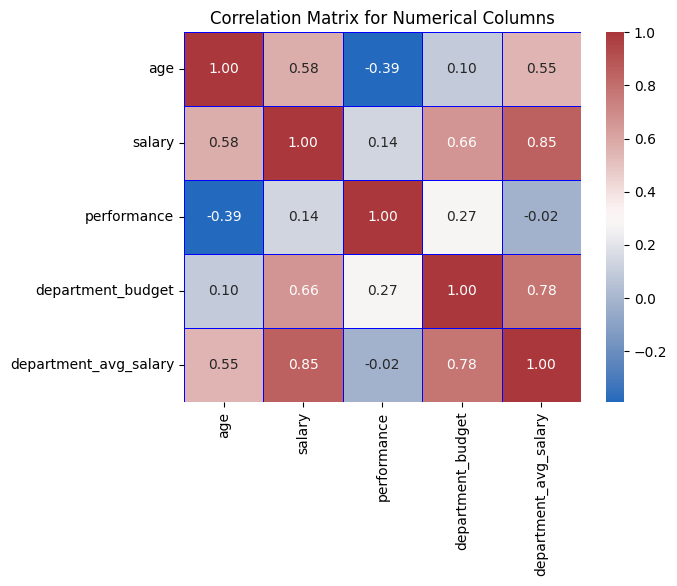

In [72]:
#visulize the correlation matrix for numerical cols
num_cols = ['age', 'salary', 'performance', 'department_budget', 'department_avg_salary']

corr = merge_df[num_cols].corr()

sns.heatmap(corr, annot=True, cmap='vlag', fmt='.2f', linewidths='0.5', linecolor='blue')
plt.title('Correlation Matrix for Numerical Columns')
plt.show()

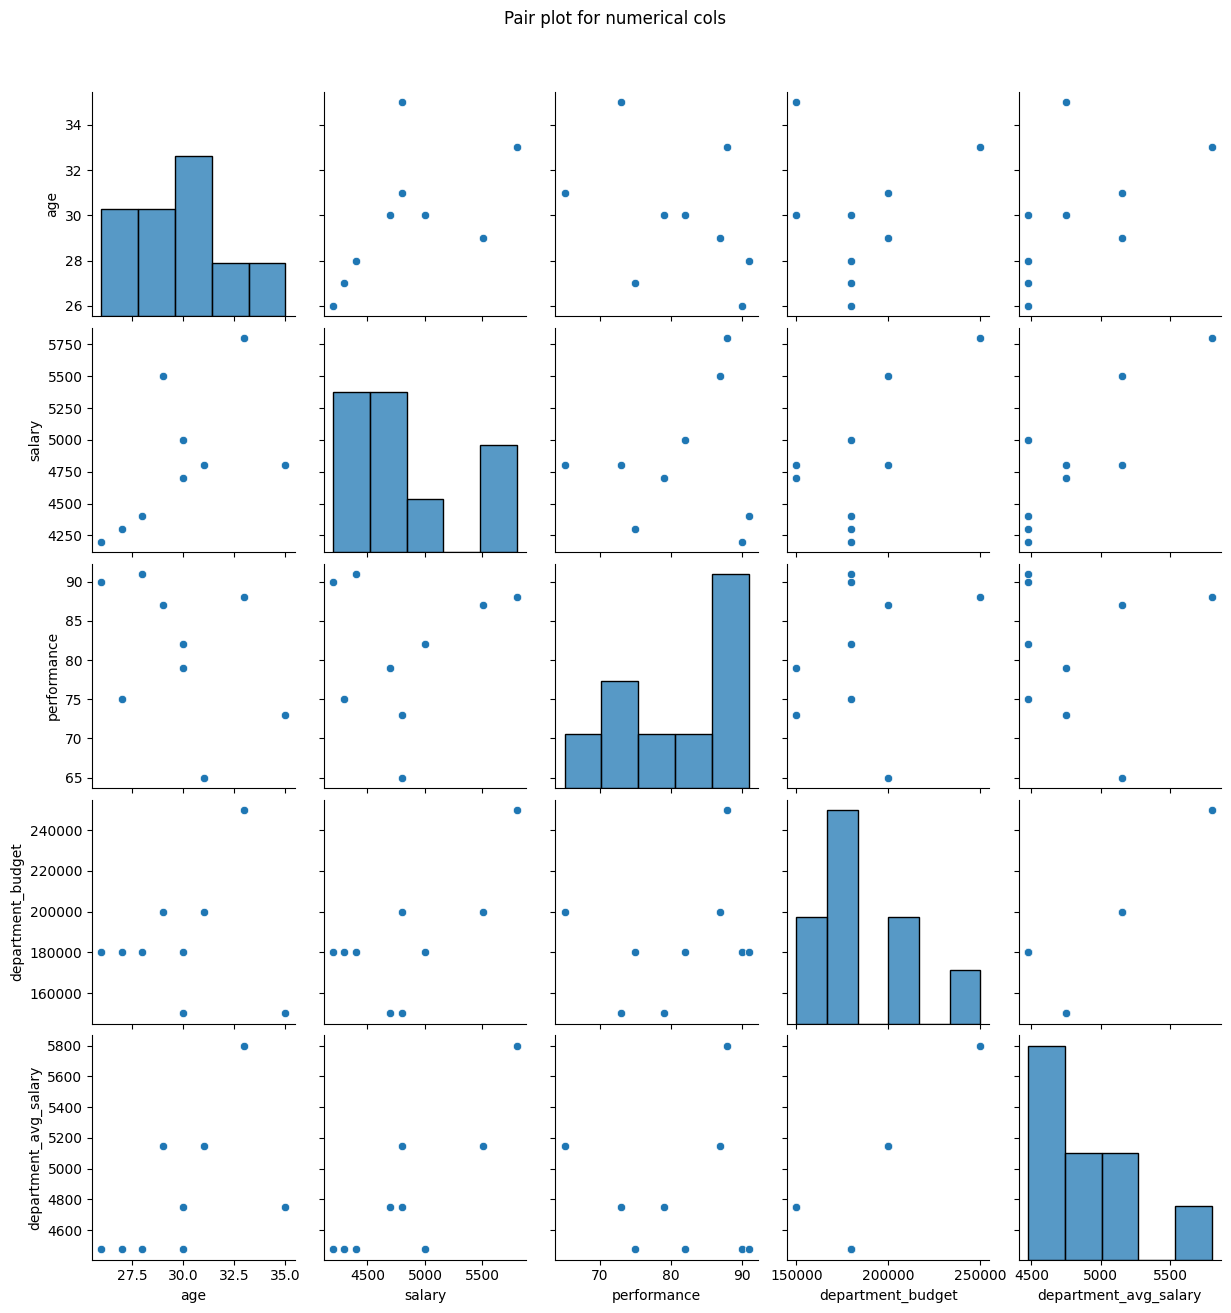

In [86]:
#visulize the relationship for numerical cols using pairplot
sns.pairplot(merge_df[num_cols])
plt.suptitle('Pair plot for numerical cols', y=1.05)
plt.show()

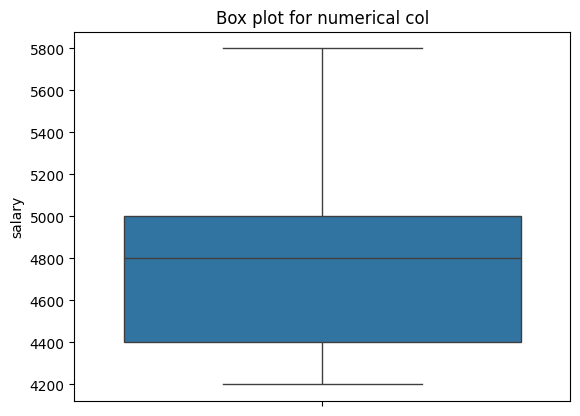

In [79]:
sns.boxplot(data=merge_df[['salary']])
plt.title('Box plot for numerical col')
plt.show()

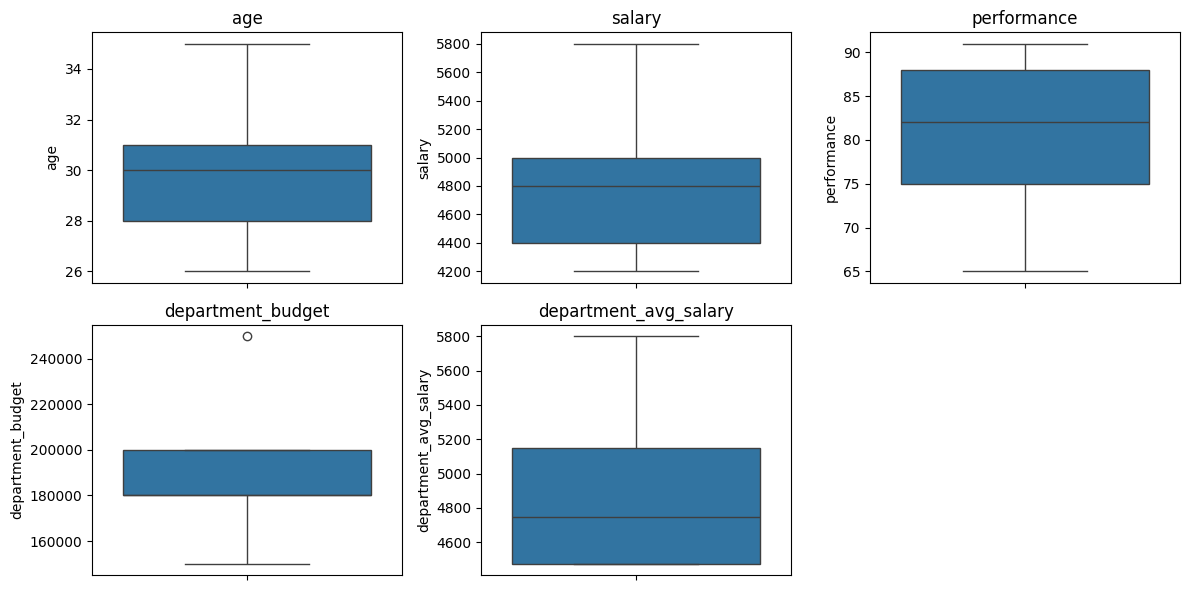

In [94]:
plt.figure(figsize=(12,6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=merge_df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [97]:
num = merge_df[['age', 'salary', 'performance', 'department_budget', 'department_avg_salary']]

Q1 = num.quantile(0.25)
Q3 = num.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (num < lower_bound) | (num > upper_bound)
print(outliers.sum())

age                      0
salary                   0
performance              0
department_budget        1
department_avg_salary    0
dtype: int64
